In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the uploaded CSV file to inspect its structure and data
file_path = 'cards_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand its structure
data.head()

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,2731,825,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,3701,825,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,42,825,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No


In [4]:
# Convert numeric columns to appropriate types
data['credit_limit'] = data['credit_limit'].replace(r'[\$,]', '', regex=True).astype(float)
data['expires'] = pd.to_datetime(data['expires'], format='%m/%Y', errors='coerce')
data['acct_open_date'] = pd.to_datetime(data['acct_open_date'], format='%m/%Y', errors='coerce')
data['year_pin_last_changed'] = pd.to_numeric(data['year_pin_last_changed'], errors='coerce')

In [20]:
# Prepare summary statistics
summary_stats = data[['card_brand', 'card_type', 'credit_limit', 'num_cards_issued', 'year_pin_last_changed']]\
    .groupby(['card_brand', 'card_type']).agg({
        'credit_limit': ['mean', 'median'],
        'num_cards_issued': 'sum',
        'year_pin_last_changed': 'median'
    }).reset_index()

summary_stats.to_csv("table1.csv", index=False)
summary_stats

card_brand        card_type  credit_limit          num_cards_issued  \
                                        mean   median              sum   
0        Amex           Credit  11436.318408  10250.0              608   
1    Discover           Credit  10816.267943   9800.0              311   
2  Mastercard           Credit  10971.653543  10200.0              953   
3  Mastercard            Debit  18279.711091  16218.0             3299   
4  Mastercard  Debit (Prepaid)     64.778068     65.0              568   
5        Visa           Credit  11295.561036   9900.0             1237   
6        Visa            Debit  19019.621212  16773.5             1957   
7        Visa  Debit (Prepaid)     63.800000     64.0              305   

  year_pin_last_changed  
                 median  
0                2013.0  
1                2012.0  
2                2012.0  
3                2013.0  
4                2012.0  
5                2012.0  
6                2012.0  
7                2013.0

In [21]:
credit_limit_stats = data.groupby('card_brand')['credit_limit'].agg(['mean', 'median', 'std', 'min', 'max']).reset_index()
credit_limit_stats.columns = ['Card Brand', 'Mean Credit Limit ($)', 'Median Credit Limit ($)', 'Std Dev ($)', 
                               'Min Credit Limit ($)', 'Max Credit Limit ($)']
credit_limit_stats.to_csv("table2.csv", index=False)
credit_limit_stats

,Card Brand,Mean Credit Limit ($),Median Credit Limit ($),Std Dev ($),Min Credit Limit ($),Max Credit Limit ($)
0,Amex,11436.318408,10250.0,7198.848230,0.0,89900.0
1,Discover,10816.267943,9800.0,5703.686683,0.0,44200.0
2,Mastercard,14659.600187,13013.0,12590.756920,0.0,151223.0
3,Visa,14737.334910,12791.5,12167.863292,0.0,132439.0


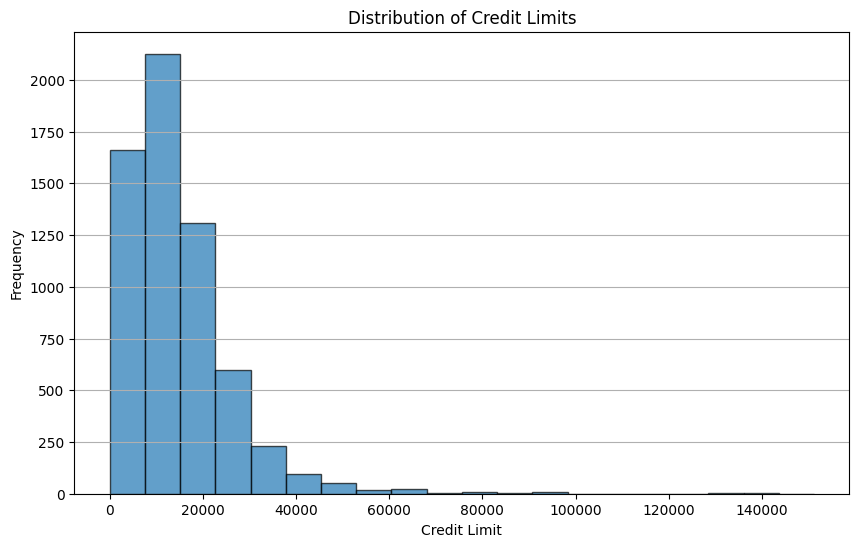

In [7]:
# Distribution of credit limits
plt.figure(figsize=(10, 6))
plt.hist(data['credit_limit'].dropna(), bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Credit Limits')
plt.xlabel('Credit Limit')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

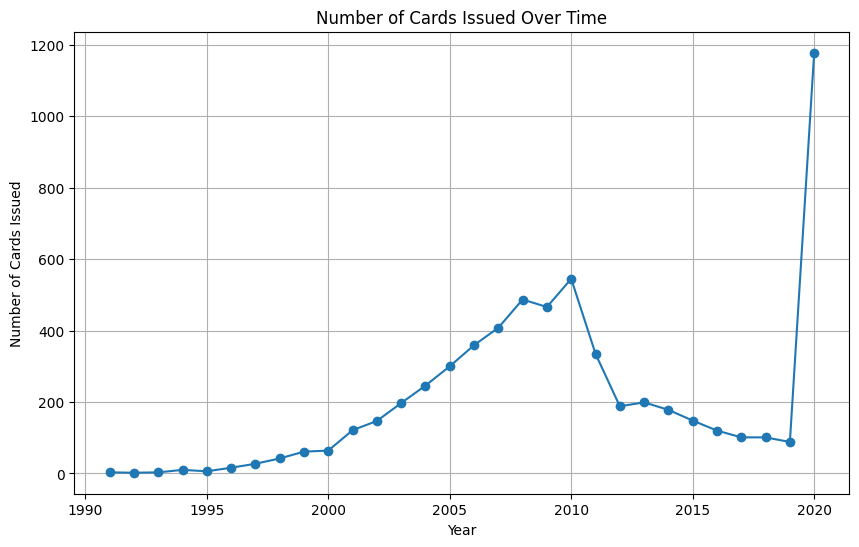

In [8]:
# Cards issued over time
cards_over_time = data['acct_open_date'].dt.year.value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.plot(cards_over_time.index, cards_over_time.values, marker='o')
plt.title('Number of Cards Issued Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Cards Issued')
plt.grid()
plt.show()

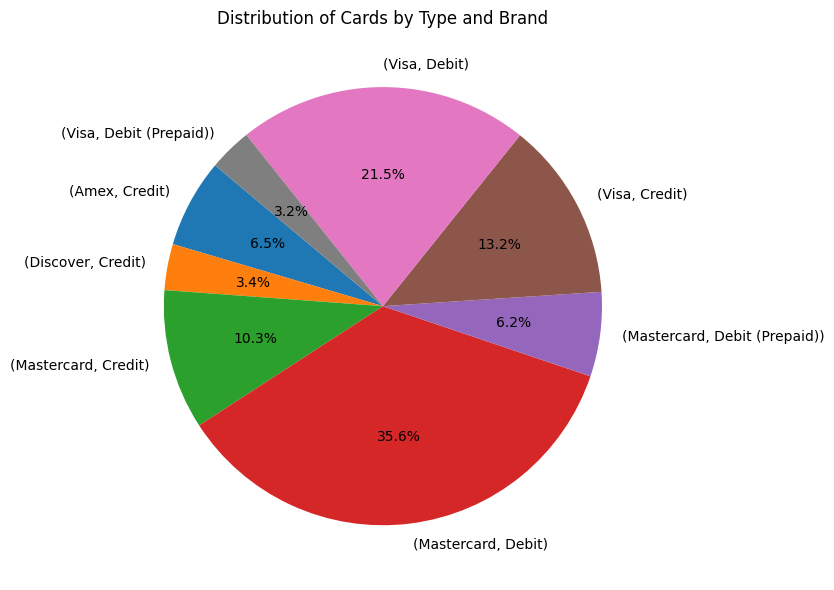

In [17]:
# Distribution of cards by type and brand
# Distribution of cards by type and brand in a pie chart
card_distribution_total = data.groupby(['card_brand', 'card_type']).size()

plt.figure(figsize=(10, 6))
card_distribution_total.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Cards by Type and Brand')
plt.ylabel('')  # Remove the default y-label for aesthetics
plt.tight_layout()
plt.show()


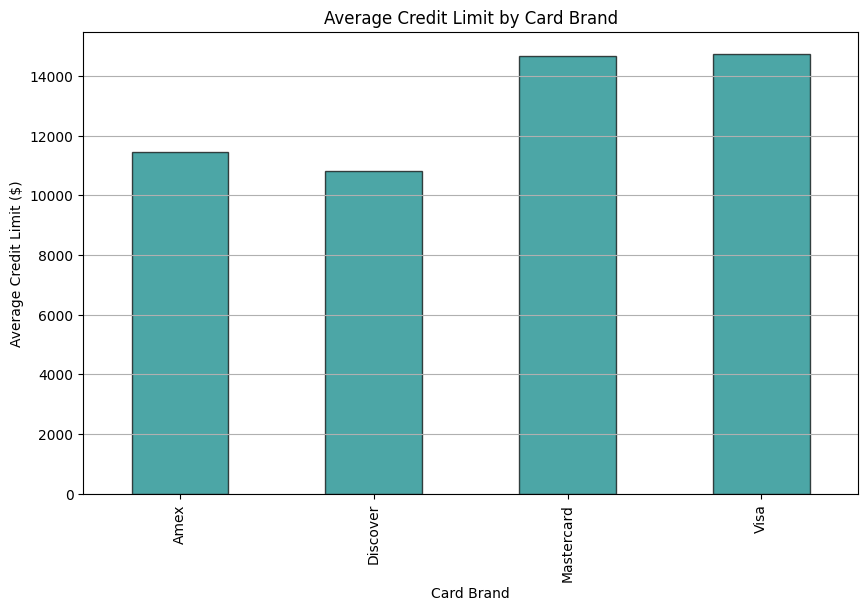

In [11]:
# Average credit limit by card brand
avg_credit_limit = data.groupby('card_brand')['credit_limit'].mean()

plt.figure(figsize=(10, 6))
avg_credit_limit.plot(kind='bar', color='teal', edgecolor='black', alpha=0.7)
plt.title('Average Credit Limit by Card Brand')
plt.xlabel('Card Brand')
plt.ylabel('Average Credit Limit ($)')
plt.grid(axis='y')
plt.show()